In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np    
import cygnus_lib as cy



In [18]:
cfile = cy.open_(run=4049, tag='LAB', posix=False, verbose=True)
image = cy.read_(cfile.file,10)

Open file: https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygnus/Data/LAB/histograms_Run04049.root
Find Keys: 100
# of Images (TH2) Files: 100 
# of Waveform (TH2) Files: 0 
Camera X, Y pixel: 2304 2304 


INFO: mean: 104.72, sigma: 18.04, N out of range: 5548 < vmin=80, 480206 > vmax=120, insane: 0


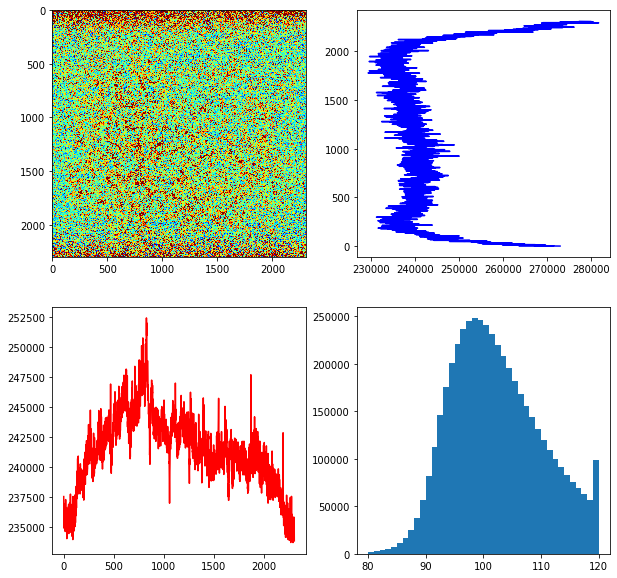

In [19]:
cy.img_proj(image, vmin=80, vmax=120, log=False)

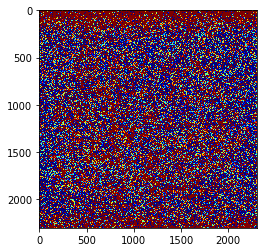

In [20]:
plt.imshow(img,cmap="jet", vmin=98, vmax=105)
plt.show()

In [21]:
mybasepath = '/workarea/cloud-storage/mazzitel/'
m_image, s_image = cy.ped_(4060, path=mybasepath+'ped/')

/workarea/cloud-storage/mazzitel/ped/run4060_mean.h5 /workarea/cloud-storage/mazzitel/ped/run4060_sigma.h5


INFO: mean: 3.18, sigma: 16.80, N out of range: 36192 < vmin=-20, 248192 > vmax=20, insane: 0


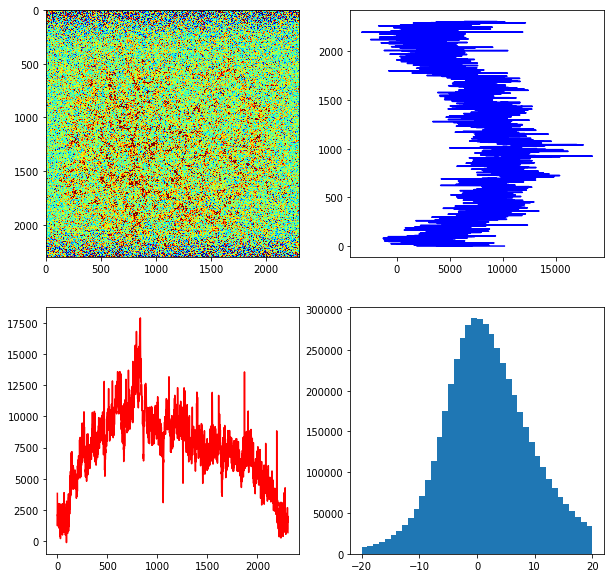

In [22]:
cy.img_proj(image-m_image, vmin=-20, vmax=20, log=False)

In [25]:
rescale = 576
nsigma=1
cimax         = 10
cimin         = 0 

th_image   = np.round(m_image + nsigma*s_image)
raw_image       = np.subtract(image,m_image)
rebin_image     = cy.rebin(raw_image, (rescale, rescale))  
rebin_th_image  = cy.rebin((th_image-m_image), (rescale, rescale))
edges = (rebin_image > rebin_th_image) & (rebin_image < cimax)
points          = np.array(np.nonzero(edges)).T.astype(float)

INFO: mean: 115.24, sigma: 82.94, N out of range: 1 < vmin=90, 1591686 > vmax=110, insane: 0


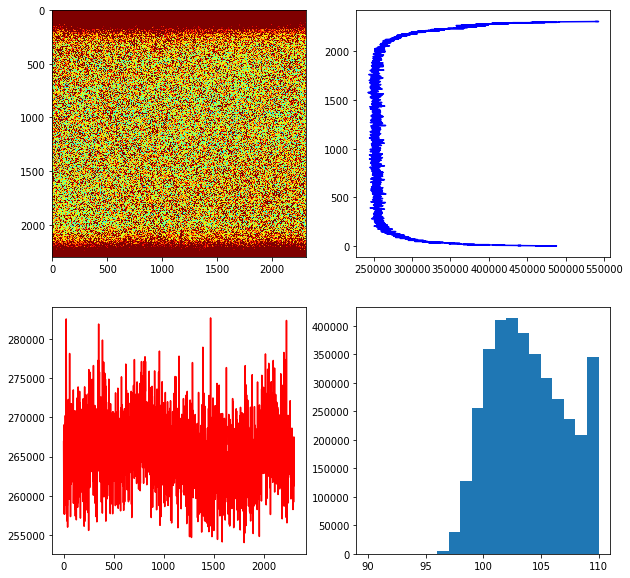

In [26]:
cy.img_proj(th_image, vmin=90, vmax=110, log=False)

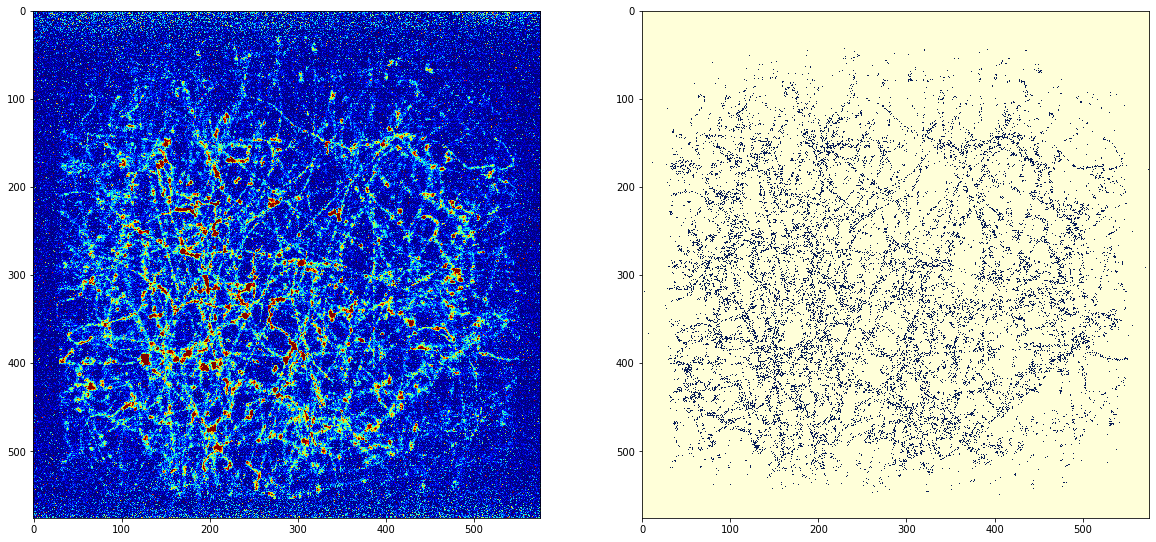

In [27]:
fig, ax = plt.subplots (1,2, figsize=(20,10))
ax[0].imshow(rebin_image, cmap='jet', vmin=0, vmax=20)
ax[1].imshow(edges, cmap='YlGnBu', vmin=0,vmax=1)
plt.show()